Import required libaries

In [7]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Then we insert all the required connection properties

In [8]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=BASIL\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [9]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [10]:
query = '''SELECT CASE WHEN ST.CountryRegionCode = 'DE' THEN 'Germany'
			WHEN ST.CountryRegionCode = 'FR' THEN 'France'
			WHEN ST.CountryRegionCode = 'GB' THEN 'United Kingdom'
			WHEN ST.CountryRegionCode = 'AU' THEN 'Australia'
			WHEN ST.CountryRegionCode = 'CA' THEN 'Canada' 
			WHEN ST.CountryRegionCode = 'US' THEN 'United States'
			END AS Country,
	SUM(SOD.OrderQTY) AS Order_Quantity,
	SUM(SOD.OrderQTY * SOD.UnitPrice) AS Revenue

FROM Sales.SalesTerritory AS ST
INNER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
INNER JOIN Sales.SalesOrderDetail AS SOD
ON SOD.SalesOrderID = SOH.SalesOrderID
Group BY CountryRegionCode
ORDER BY Revenue 
;'''

query2 = '''SELECT * FROM S_R'''


Here we assign the resulting table returned from the database as a variable 'C_R'. 
This is also where our connection actually runs using the defined properties and query above

In [11]:
C_R = pd.read_sql(query, conn)
S_R = pd.read_sql(query2, conn)

C:\Users\basil\AppData\Local\Temp\ipykernel_10256\484412159.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  C_R = pd.read_sql(query, conn)
C:\Users\basil\AppData\Local\Temp\ipykernel_10256\484412159.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  S_R = pd.read_sql(query2, conn)


Let's get a preview of what our data looks like:

In [12]:
#print(C_R.head())
#print(C_R.tail())

print(S_R.head())

          Country  stores  Order_Quantity       Revenue
0       Australia      40           18293  1.068387e+07
1          Canada     115           49381  1.644113e+07
2         Germany      40           13143  4.945860e+06
3          France      40           19906  7.291472e+06
4  United Kingdom      40           20099  7.702839e+06


After we have the table we can now make a scatter plot, to make the scatter plot with a trendline i had to use numpy as numpy has the function needed for the trendline, i transformed my points into a numpy array, this allows us to make calculations with the dataset

C:\Users\basil\AppData\Local\Temp\ipykernel_10256\2015787415.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color1 = plt.cm.get_cmap('Greens', len(x))


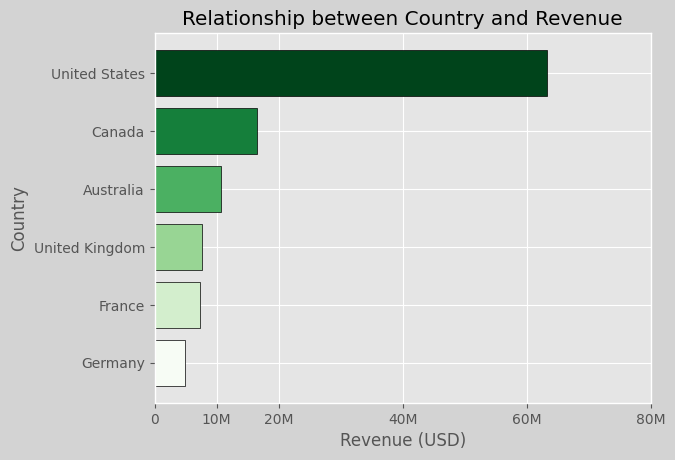

['Germany' 'France' 'United Kingdom' 'Australia' 'Canada' 'United States']


In [23]:
x = np.array(C_R['Country'])
y = np.array(C_R['Revenue'])
color1 = plt.cm.get_cmap('Greens', len(x))
plt.barh(x, y, color=[color1(i) for i in np.linspace(0, 1, len(x))], edgecolor = 'Black')
plt.gcf().set_facecolor('lightgray')
plt.style.use('ggplot')
plt.xticks([0, 10000000, 20000000, 40000000, 60000000, 80000000], ['0', '10M', '20M', '40M', '60M','80M'])
plt.xlabel('Revenue (USD)')
plt.ylabel('Country')
plt.title('Relationship between Country and Revenue')
plt.show()
print(x)




['Australia' 'Canada' 'Germany' 'France' 'United Kingdom' 'United States']


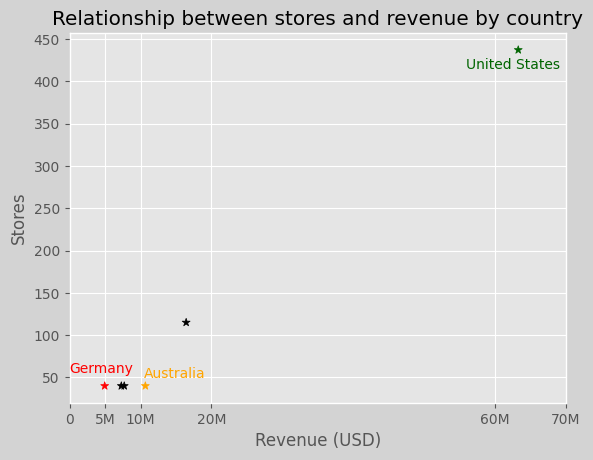

In [21]:
store = np.array(S_R['stores'])
revenue = np.array(S_R['Revenue'])
country = np.array(S_R['Country'])
color = ['orange', 'black', 'red', 'black', 'black', 'darkgreen']

plt.scatter(revenue, store, c = color, label = country, marker = '*')
plt.xlabel('Revenue (USD)')
plt.ylabel('Stores')
plt.gcf().set_facecolor('lightgray')
plt.text(56000000, 415, 'United States', color = 'darkgreen')
plt.text(0, 55, 'Germany', color = 'red')
plt.text(10500000, 50, 'Australia', color = 'orange')
plt.xticks([0, 5000000, 10000000, 20000000, 60000000, 70000000], [0, '5M', '10M', '20M', '60M', '70M'])
plt.title('Relationship between stores and revenue by country')
print(country)

